# **Practice N° 1**
---
## **Problem 2**
### **Topic: Classification**

#**Problem 2**
NOTE: for the development of this point is needed the file: "CMEs.csv"

---

###**Work flow**

We'll follow the typical workflow of a machine learning software development project, this steps are:

- Data acquisition
- Pre processing data
- Feature engineering
- Data preparation
- Modeling
- Classification and validation of the models



## **Data acquisition**

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
pd.set_option('display.max_rows', 500)

In [ ]:
df = pd.read_csv("CMEs.csv")
#print(df)
#df.describe()

## **Pre processing data**

In [ ]:
sunActivityCat = {'low':0, 'high':1}
df['SunActivity'] = df['SunActivity'].map(sunActivityCat)
originCat = {'no flare':0, 'flare':1}
df['Origin'] = df['Origin'].map(originCat)
print(df)

## **Feature engineering**

In [ ]:
# data balance
amountOfFlaresAndNoFlares = df['Origin'].value_counts()
print("cantidades --> ", amountOfFlaresAndNoFlares)

cantidades -->  0    35
1    30
Name: Origin, dtype: int64


## **Data preparation**

In [ ]:
# take features
features = df.loc[:, df.columns != "Origin"]
# take target
target = df.loc[:, df.columns == "Origin"]

print(features.shape)
print(target.shape)

(65, 2)
(65, 1)


In [ ]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(58, 2) (7, 2) (58, 1) (7, 1)


In [ ]:
amountOfFlaresAndNoFlares = target_train["Origin"].value_counts()
print("cantidades --> ", amountOfFlaresAndNoFlares) 

cantidades -->  0    31
1    27
Name: Origin, dtype: int64


In [ ]:
# very interesting for split data
'''

import numpy as np
from sklearn.model_selection import StratifiedKFold

print()

skf = StratifiedKFold(n_splits=4)
for train, test in skf.split(features, target):
    #print('train -  {}   |   test -  {}'.format(
        #np.bincount(target[train]), np.bincount(target[test].values)))
    train = df.iloc[train]
    test = df.iloc[test]

    amountOfFlaresAndNoFlares = train["Origin"].value_counts()
    print("cantidades --> ", amountOfFlaresAndNoFlares) 
    amountOfFlaresAndNoFlares = test["Origin"].value_counts()
    print("cantidades --> ", amountOfFlaresAndNoFlares)     
'''

## **Modeling**

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
#from keras.metrics import Accuracy
import tensorflow as tf

In [ ]:
print(features_train.shape)
print(target_train.shape)

(58, 2)
(58, 1)


In [ ]:
my_input_dim = features_train.shape[1]

model = Sequential()

# model configuration
model.add(Dense(34, input_dim=my_input_dim))
model.add(Activation('relu'))
#model.add(Dense(34))
#model.add(Activation('relu'))
#model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[tf.keras.metrics.Accuracy()])

# traing model
history = model.fit(features_train, target_train, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
2/2 - 0s - loss: 116.5541 - accuracy: 0.4130 - val_loss: 59.4700 - val_accuracy: 0.6667
Epoch 2/50
2/2 - 0s - loss: 107.0220 - accuracy: 0.4130 - val_loss: 55.7217 - val_accuracy: 0.6667
Epoch 3/50
2/2 - 0s - loss: 100.4302 - accuracy: 0.4130 - val_loss: 52.6340 - val_accuracy: 0.6667
Epoch 4/50
2/2 - 0s - loss: 94.7615 - accuracy: 0.4130 - val_loss: 49.6595 - val_accuracy: 0.6667
Epoch 5/50
2/2 - 0s - loss: 89.5163 - accuracy: 0.4130 - val_loss: 47.0605 - val_accuracy: 0.6667
Epoch 6/50
2/2 - 0s - loss: 84.8535 - accuracy: 0.4130 - val_loss: 44.6267 - val_accuracy: 0.6667
Epoch 7/50
2/2 - 0s - loss: 80.3912 - accuracy: 0.4130 - val_loss: 42.1842 - val_accuracy: 0.6667
Epoch 8/50
2/2 - 0s - loss: 76.0840 - accuracy: 0.4130 - val_loss: 39.9880 - val_accuracy: 0.6667
Epoch 9/50
2/2 - 0s - loss: 71.9819 - accuracy: 0.4130 - val_loss: 37.6420 - val_accuracy: 0.6667
Epoch 10/50
2/2 - 0s - loss: 67.7902 - accuracy: 0.4130 - val_loss: 35.4473 - val_accuracy: 0.6667
Epoch 11/50
2/2 

## **Classification and validation of the models**

In [ ]:
'''
tf.keras.backend.clear_session()
from keras import backend as K
K.clear_session()
del model
'''

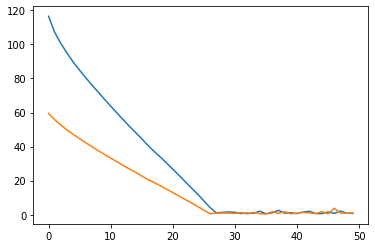

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

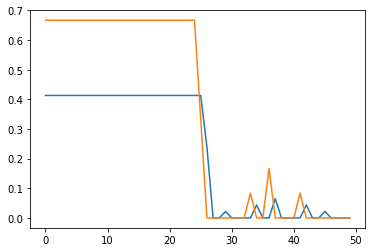

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#from tensorflow._api.v2.math import confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
yhat = model.predict(features_test)
#yhat_new = np.ravel(yhat)
yhat_new = np.round(yhat_new)
target_test_new = np.ravel(target_test)

yhat_new = yhat_new.tolist()
target_test_new = target_test_new.tolist()

print(confusion_matrix(target_test_new, yhat_new))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1, 0, 0, 0, 0, 1, 1]
[[0 4]
 [0 3]]


## **Somethings about confusion matrix of scikit-learn**

In [ ]:

tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 1]).ravel()
(tn, fp, fn, tp)

# TN | FP
# FN | TP


(0, 2, 0, 2)

In [ ]:
print(confusion_matrix([0, 1, 0, 1], [1, 1, 1, 1]))

[[0 2]
 [0 2]]
